In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.W_HAR)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-11 11:09:32,302 - whar-datasets - INFO - Running DownloadingStep
2026-02-11 11:09:32,302 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-11 11:09:32,304 - whar-datasets - INFO - Hash is up to date
2026-02-11 11:09:32,304 - whar-datasets - INFO - Running ParsingStep
2026-02-11 11:09:32,305 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-11 11:09:32,307 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:09:32,308 - whar-datasets - INFO - Checking download
2026-02-11 11:09:32,309 - whar-datasets - INFO - Download exists
2026-02-11 11:09:32,310 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 928/928 [00:02<00:00, 339.51it/s]
2026-02-11 11:09:38,255 - whar-datasets - INFO - Saving common format
2026-02-11 11:09:38,872 - whar-datasets - INFO - Running WindowingStep
2026-02-11 11:09:38,872 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-11 11:09:38,873 - whar-datasets - INFO - Hash is n

[########################################] | 100% Completed | 2.56 sms


2026-02-11 11:09:41,781 - whar-datasets - INFO - Common format validated.
2026-02-11 11:09:41,781 - whar-datasets - INFO - Compute windowing
2026-02-11 11:09:41,781 - whar-datasets - INFO - Selecting activities
2026-02-11 11:09:41,786 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 7.03 sms


2026-02-11 11:09:49,126 - whar-datasets - INFO - Saving windowing
2026-02-11 11:09:52,115 - whar-datasets - INFO - Loading windowing
2026-02-11 11:09:52,121 - whar-datasets - INFO - activity_ids from 0 to 8
2026-02-11 11:09:52,121 - whar-datasets - INFO - subject_ids from 0 to 21


In [10]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 7516 1878 2672
subject_1 7722 1930 2414
subject_2 9566 2391 109
subject_3 9076 2269 721
subject_4 9378 2344 344
subject_5 9117 2279 670
subject_6 9475 2368 223
subject_7 9478 2369 219
subject_8 9299 2324 443
subject_17 9559 2389 118
subject_18 9628 2407 31
subject_19 9309 2327 430
subject_20 9408 2352 306
subject_21 9591 2397 78
subject_11 9621 2405 40
subject_12 9356 2339 371
subject_13 9302 2325 439
subject_9 9328 2331 407
subject_10 9580 2395 91
subject_14 9225 2306 535
subject_15 9241 2310 515
subject_16 8941 2235 890


In [11]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-11 11:10:42,564 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:10:42,566 - whar-datasets - INFO - Running SamplingStep
2026-02-11 11:10:42,566 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-11 11:10:42,569 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:10:43,872 - whar-datasets - INFO - Computing samples
2026-02-11 11:10:43,872 - whar-datasets - INFO - Getting normalization parameters
2026-02-11 11:10:44,042 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 5.93 ss


2026-02-11 11:10:50,259 - whar-datasets - INFO - Saving samples
2026-02-11 11:10:50,388 - whar-datasets - INFO - Loading samples


In [12]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)

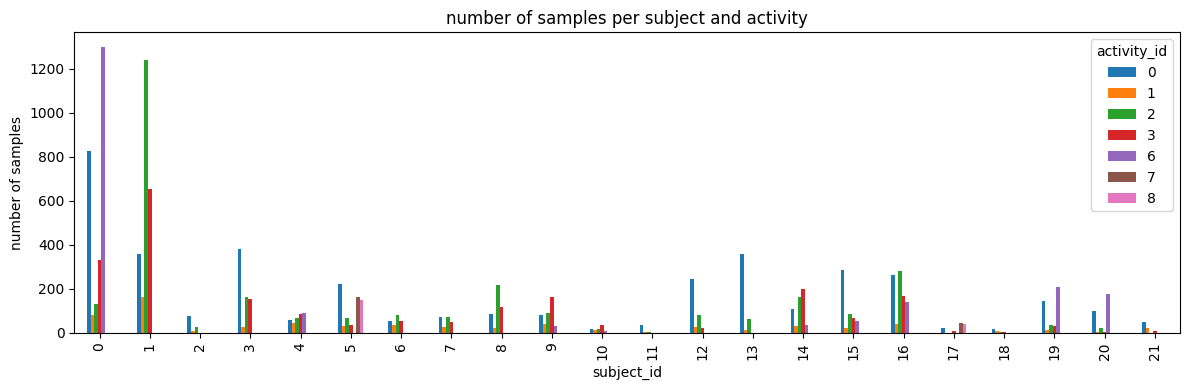

In [13]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 2, Subject: 1')

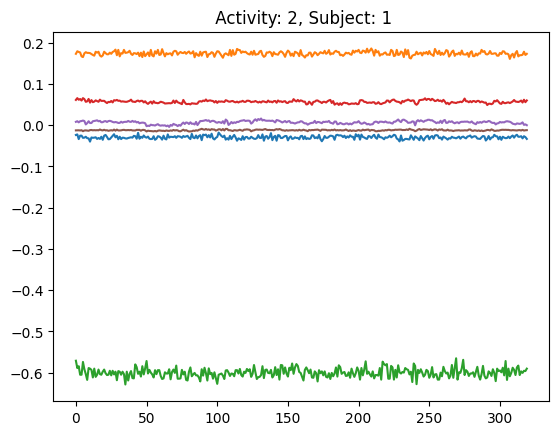

In [ ]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")